# R Data Analysis

After data cleaning was completed in Pandas, we are now attempting to run the analysis using R. The newly cleaned data will be uploaded as a csv and we will run multiple analysis to confirm whether or not the relationships we have proposed are supported in the data. We have also used R to continue to clean any other parts of the dataset that was necessary and not completed in Pandas

In [1]:
#reading the csv file 

setwd("~/Desktop/HRV/")


In [2]:
#creating DataFrame
DF<-read.csv("HRV_heart_rate_data.csv", header=T)



In [3]:
head(DF)

nsrrid,gender_x,race_x,age_s1_x,BLUE25,ihr,NN_RR,AVNN,SDNN,VLF,LF,HF,HF_n,LF_HF
200079,2,3,56,5,75.11295,0.992000,798.797,46.21180,695.6390,285.53000,827.04600,0.7433614,0.345241
200082,1,1,40,6,59.35540,0.996610,1010.860,39.43320,739.2121,531.02400,242.83100,0.3137939,2.186800
200108,2,1,60,5,64.95440,0.990741,923.725,27.72130,532.0790,168.40600,81.90150,0.3272035,2.056200
200109,2,1,71,6,76.86543,0.997389,780.585,8.41453,55.3561,8.87934,4.38036,0.3303514,2.027080
200112,1,1,48,5,62.34829,0.996785,962.336,88.53440,3987.3524,3269.69000,292.34900,0.0820735,11.184200
200116,2,3,83,6,60.18555,0.996667,996.917,35.31590,958.1760,291.28400,97.68640,0.2511410,2.981830


In [4]:
# The first row of the data, checking to make sure I am getting my header and data read correctly
DF[1, ]

nsrrid,gender_x,race_x,age_s1_x,BLUE25,ihr,NN_RR,AVNN,SDNN,VLF,LF,HF,HF_n,LF_HF
200079,2,3,56,5,75.11295,0.992,798.797,46.2118,695.639,285.53,827.046,0.7433614,0.345241


In [5]:
#Finding and removing rows with missing data
#The results of complete.cases() is a logical vector with 
#the value TRUE for rows that are complete, and FALSE for rows that have some NA values. 

str(DF)
complete.cases(DF)

'data.frame':	486 obs. of  14 variables:
 $ nsrrid  : int  200079 200082 200108 200109 200112 200116 200117 200123 200125 200133 ...
 $ gender_x: int  2 1 2 2 1 2 2 2 2 2 ...
 $ race_x  : int  3 1 1 1 1 3 1 1 1 1 ...
 $ age_s1_x: int  56 40 60 71 48 83 43 49 48 74 ...
 $ BLUE25  : num  5 6 5 6 5 6 5 6 5 5 ...
 $ ihr     : num  75.1 59.4 65 76.9 62.3 ...
 $ NN_RR   : num  0.992 0.997 0.991 0.997 0.997 ...
 $ AVNN    : num  799 1011 924 781 962 ...
 $ SDNN    : num  46.21 39.43 27.72 8.41 88.53 ...
 $ VLF     : num  695.6 739.2 532.1 55.4 3987.4 ...
 $ LF      : num  285.53 531.02 168.41 8.88 3269.69 ...
 $ HF      : num  827.05 242.83 81.9 4.38 292.35 ...
 $ HF_n    : num  0.7434 0.3138 0.3272 0.3304 0.0821 ...
 $ LF_HF   : num  0.345 2.187 2.056 2.027 11.184 ...


[1]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [13]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [25]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [37]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [49]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [61]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [73]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [85]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [97]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[109]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[121]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[133]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[145]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[157]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[169]  TRUE  TRUE FALSE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE
[181]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[193] FALSE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE
[205] FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[217]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE FALSE
[229]  TRUE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE
[241]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE
[253]  TRUE FALSE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE
[265]  TRUE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE
[277]  TRUE  TRUE FALSE FALSE  TRUE  TRUE FALSE  TRUE FALSE  TRUE  TRUE FALSE
[289] FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE
[301]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE FALSE
[313]  TRUE FALSE FALSE FALSE FALSE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[325]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[337]  TRUE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[349]  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE
[361] FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[373]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE FALSE  TRUE  TRUE
[385]  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[397]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[409]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[421]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[433]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[445]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[457]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[469]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[481]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE

In [6]:
#This is to remove the rows with missing data from DF
DF2 <- DF[complete.cases(DF), ]
str(DF2)

'data.frame':	449 obs. of  14 variables:
 $ nsrrid  : int  200079 200082 200108 200109 200112 200116 200117 200123 200125 200133 ...
 $ gender_x: int  2 1 2 2 1 2 2 2 2 2 ...
 $ race_x  : int  3 1 1 1 1 3 1 1 1 1 ...
 $ age_s1_x: int  56 40 60 71 48 83 43 49 48 74 ...
 $ BLUE25  : num  5 6 5 6 5 6 5 6 5 5 ...
 $ ihr     : num  75.1 59.4 65 76.9 62.3 ...
 $ NN_RR   : num  0.992 0.997 0.991 0.997 0.997 ...
 $ AVNN    : num  799 1011 924 781 962 ...
 $ SDNN    : num  46.21 39.43 27.72 8.41 88.53 ...
 $ VLF     : num  695.6 739.2 532.1 55.4 3987.4 ...
 $ LF      : num  285.53 531.02 168.41 8.88 3269.69 ...
 $ HF      : num  827.05 242.83 81.9 4.38 292.35 ...
 $ HF_n    : num  0.7434 0.3138 0.3272 0.3304 0.0821 ...
 $ LF_HF   : num  0.345 2.187 2.056 2.027 11.184 ...


In [7]:
#saving new dataframe as a csv and to be used as the dataframe for analysis
head(DF2)

nsrrid,gender_x,race_x,age_s1_x,BLUE25,ihr,NN_RR,AVNN,SDNN,VLF,LF,HF,HF_n,LF_HF
200079,2,3,56,5,75.11295,0.992000,798.797,46.21180,695.6390,285.53000,827.04600,0.7433614,0.345241
200082,1,1,40,6,59.35540,0.996610,1010.860,39.43320,739.2121,531.02400,242.83100,0.3137939,2.186800
200108,2,1,60,5,64.95440,0.990741,923.725,27.72130,532.0790,168.40600,81.90150,0.3272035,2.056200
200109,2,1,71,6,76.86543,0.997389,780.585,8.41453,55.3561,8.87934,4.38036,0.3303514,2.027080
200112,1,1,48,5,62.34829,0.996785,962.336,88.53440,3987.3524,3269.69000,292.34900,0.0820735,11.184200
200116,2,3,83,6,60.18555,0.996667,996.917,35.31590,958.1760,291.28400,97.68640,0.2511410,2.981830


In [8]:
write.csv(DF2,"cleanNIH.csv", row.names = FALSE)


In [9]:
head(DF2)

nsrrid,gender_x,race_x,age_s1_x,BLUE25,ihr,NN_RR,AVNN,SDNN,VLF,LF,HF,HF_n,LF_HF
200079,2,3,56,5,75.11295,0.992000,798.797,46.21180,695.6390,285.53000,827.04600,0.7433614,0.345241
200082,1,1,40,6,59.35540,0.996610,1010.860,39.43320,739.2121,531.02400,242.83100,0.3137939,2.186800
200108,2,1,60,5,64.95440,0.990741,923.725,27.72130,532.0790,168.40600,81.90150,0.3272035,2.056200
200109,2,1,71,6,76.86543,0.997389,780.585,8.41453,55.3561,8.87934,4.38036,0.3303514,2.027080
200112,1,1,48,5,62.34829,0.996785,962.336,88.53440,3987.3524,3269.69000,292.34900,0.0820735,11.184200
200116,2,3,83,6,60.18555,0.996667,996.917,35.31590,958.1760,291.28400,97.68640,0.2511410,2.981830


Here we are attempting to understand any surface level relationships between two variables. 
We know the parameter "BLUE25" is a range of values from low to severe (1 to 6) which grades depresssion levels of the assigned IDs ("nssrrid"). 

Our first linear regression analysis will be to see whether or not resting heart rate and depression are related. We also have a scatter plot to describe our initial analysis.

In [10]:
#assigning variables to do linear regression analysis
x= DF2$ihr

In [11]:
y=DF2$BLUE25

In [12]:
lm(ihr ~ BLUE25,data=DF2)


Call:
lm(formula = ihr ~ BLUE25, data = DF2)

Coefficients:
(Intercept)       BLUE25  
     74.035       -1.579  


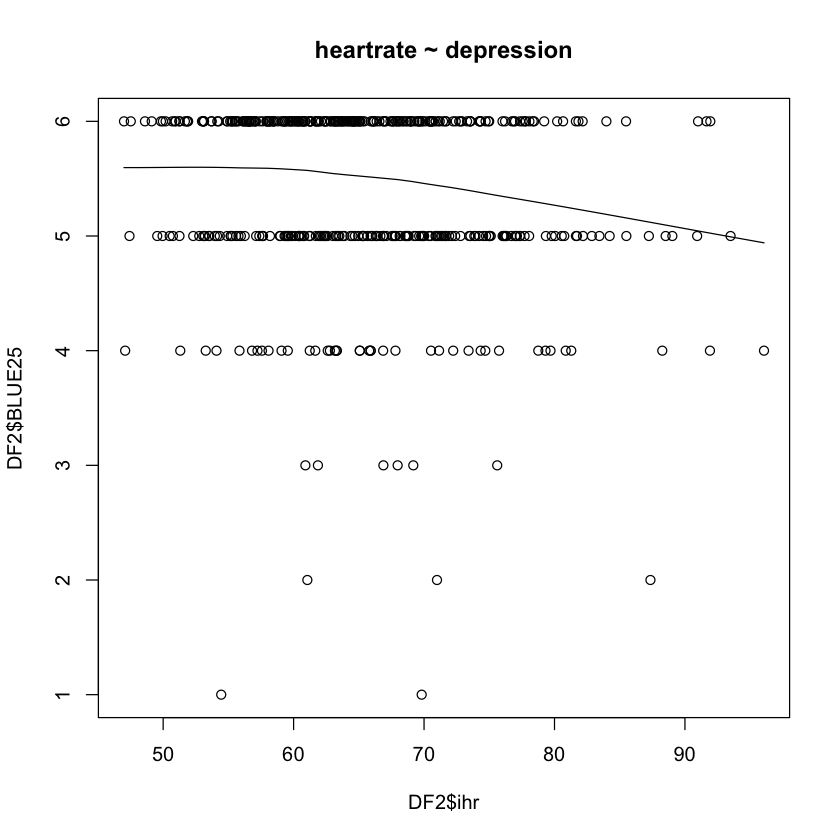

In [13]:
scatter.smooth(x=DF2$ihr, y=DF2$BLUE25, main="heartrate ~ depression")  
# scatterplot, you can see there is no clear relationship between the two variables, I will move on to SDNN

In [14]:
#assigning variables to do linear regression analysis
x= DF2$SDNN

In [15]:
y=DF2$BLUE25

In [16]:
lm(ihr ~ BLUE25,data=DF2)


Call:
lm(formula = ihr ~ BLUE25, data = DF2)

Coefficients:
(Intercept)       BLUE25  
     74.035       -1.579  


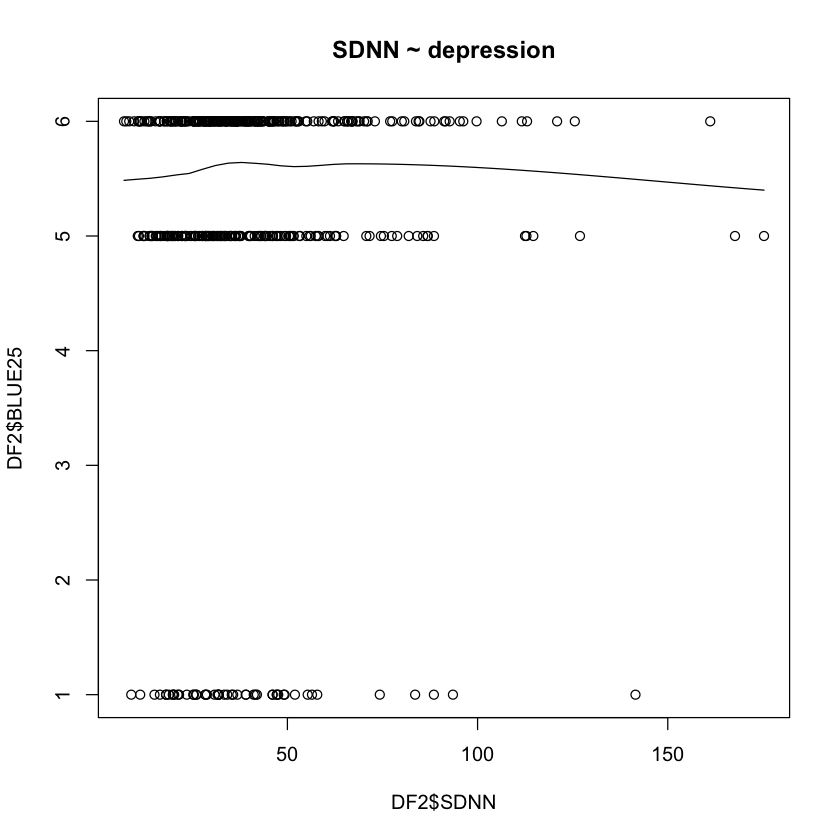

In [58]:
scatter.smooth(x=DF2$SDNN, y=DF2$BLUE25, main="SDNN ~ depression") 

In [18]:
cor(DF2$SDNN, DF2$BLUE25)

[1] -0.001535331

In [19]:
#very high p value, not statistically significant
relation <- lm(y~x)

print(summary(relation))


Call:
lm(formula = y ~ x)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.3675 -0.3703  0.6289  0.6301  0.6364 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  5.372e+00  7.466e-02  71.946   <2e-16 ***
x           -5.085e-05  1.566e-03  -0.032    0.974    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.8146 on 447 degrees of freedom
Multiple R-squared:  2.357e-06,	Adjusted R-squared:  -0.002235 
F-statistic: 0.001054 on 1 and 447 DF,  p-value: 0.9741



In [20]:
linearMod <- lm(y ~ x, data=DF2)  # build linear regression model on full data
print(linearMod)


Call:
lm(formula = y ~ x, data = DF2)

Coefficients:
(Intercept)            x  
  5.372e+00   -5.085e-05  



In [21]:
# The predictor vector.
x <- c(46.2, 97.8, 101.3, 186, 56, 36, 79, 63, 52, 31)

# The response vector.
y <- c(6, 1, 6, 1, 4, 5, 6, 2, 2, 4)

# Apply the lm() function.
relation <- lm(y~x)

# Find depression of a person with SDNN 170.
a <- data.frame(x = 170)
result <-  predict(relation,a)
print(result)

       1 
1.844333 


In [23]:
x= DF2$SDNN
y=DF2$BLUE25

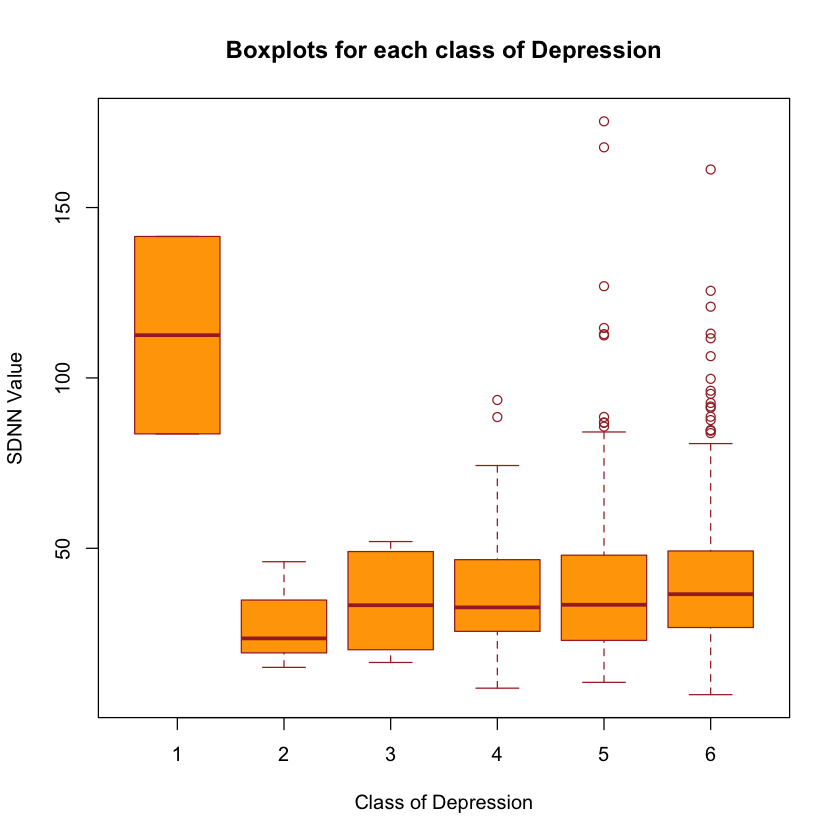

In [35]:
boxplot(SDNN~BLUE25,data=DF2, main="Boxplots for each class of Depression", xlab="Class of Depression",
ylab="SDNN Value", 
col="orange",
border="brown"
)

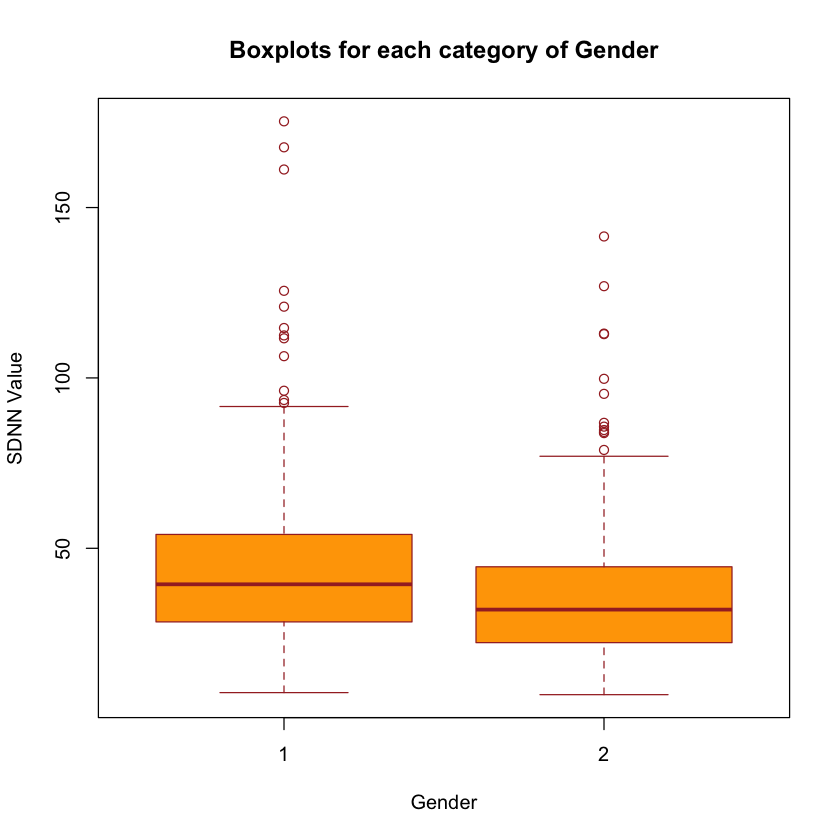

In [57]:
boxplot(SDNN~gender_x,data=DF2, main="Boxplots for each category of Gender", xlab="Gender",
ylab="SDNN Value",
col="orange",
border="brown"
)

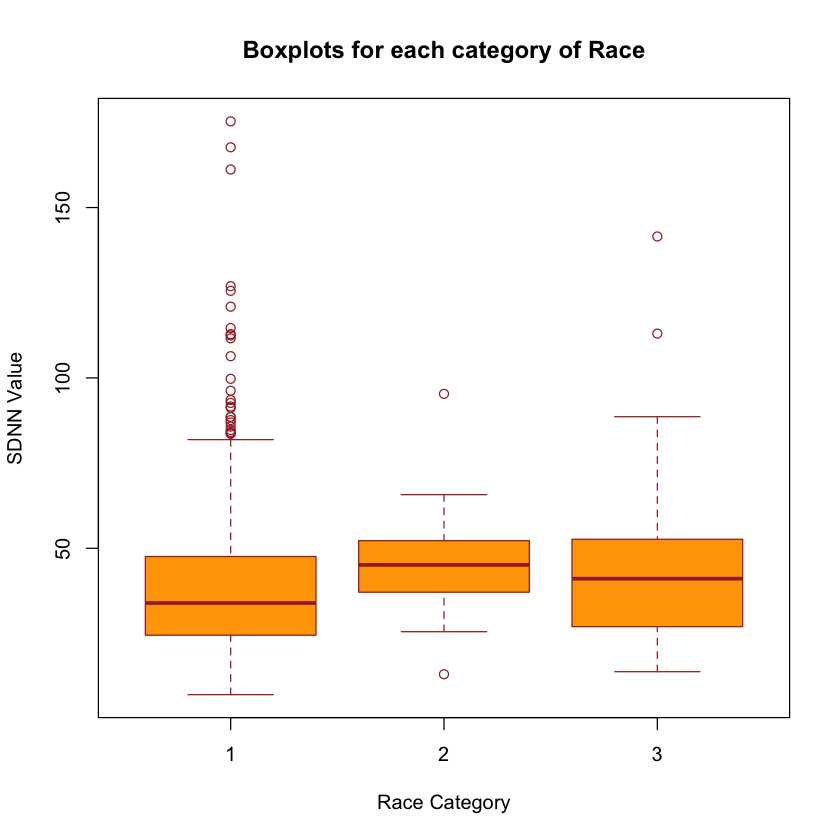

In [56]:
boxplot(SDNN~race_x,data=DF2, main="Boxplots for each category of Race", xlab="Race Category",
ylab="SDNN Value",
col="orange",
border="brown"
)

#max SDNN for group 2 is the lowest among all groups

In [46]:
depression <- NULL
depression[DF2$BLUE25 >= 4] = 1
depression[DF2$BLUE25 < 4] = 0


#creating dummy variables for BLUE25 naming it depression

In [48]:
logitMod <- glm(depression ~ SDNN + race_x + gender_x + VLF + HF + LF + LF_HF , data=DF2, family=binomial(link="logit"))
summary(logitMod)


Call:
glm(formula = depression ~ SDNN + race_x + gender_x + VLF + HF + 
    LF + LF_HF, family = binomial(link = "logit"), data = DF2)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.3214   0.4197   0.4571   0.4847   0.8369  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)   
(Intercept)  2.248e+00  8.223e-01   2.734  0.00626 **
SDNN         8.705e-03  2.027e-02   0.429  0.66757   
race_x      -5.426e-01  1.963e-01  -2.764  0.00570 **
gender_x     8.290e-02  3.128e-01   0.265  0.79100   
VLF         -7.065e-05  1.144e-04  -0.618  0.53685   
HF          -6.996e-05  2.603e-04  -0.269  0.78812   
LF           1.075e-04  3.501e-04   0.307  0.75875   
LF_HF        4.603e-02  7.834e-02   0.588  0.55679   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 317.84  on 448  degrees of freedom
Residual deviance: 309.11  on 441  degrees of freedom
AIC: 325.11

Nu